In [1]:
import pandas as pd
import os

def summarize_table(df):
    n_rows, n_columns = df.shape
    summary = df.describe()
    print(f"The table contains {n_rows} rows and {n_columns} columns.")
    print("Table Summary:\n")
    print(summary.to_string())

current_dir = os.getcwd()
print("Current directory:", current_dir)

file_path = "C:\\Users\\romeo\\profiles.csv"
df_profile = pd.read_csv(file_path)
summarize_table(df_profile)

Current directory: C:\Users\romeo\Casestudy\friendhook
The table contains 4039 rows and 6 columns.
Table Summary:

          Profile_ID           Sex Relationship_Status          Dorm         Major          Year
count           4039          4039                3631          4039          4039          4039
unique          4039             2                   3            15            30             4
top     b8bc075e54b9  e807eb960650        ac0b88e46e20  a8e6e404d1b3  141d4cdd5aaf  c1a648750a4b
freq               1          2020                1963          2739          1366          1796


In [2]:
is_null = df_profile.Relationship_Status.isnull()
num_null = df_profile[is_null].shape[0]
print(f"{num_null} profiles are missing the Relationship_Status field.")

408 profiles are missing the Relationship_Status field.


In [3]:
unique_ids = set(df_profile.Relationship_Status.values)
print(unique_ids)

{nan, 'ac0b88e46e20', '9cea719429e9', '188f9a32c360'}


In [4]:
import numpy as np
category_map = {'9cea719429e9': 0, np.nan: 1, '188f9a32c360': 2,
'ac0b88e46e20': 3}

In [5]:
nums = [category_map[hash_code]
for hash_code in df_profile.Relationship_Status.values]
df_profile['Relationship_Status'] = nums
print(df_profile.Relationship_Status)

0       0
1       3
2       3
3       3
4       0
       ..
4034    3
4035    0
4036    3
4037    3
4038    0
Name: Relationship_Status, Length: 4039, dtype: int64


In [6]:
col_to_mapping = {'Relationship_Status': category_map}
for column in df_profile.columns:
    if column in col_to_mapping:
        continue
    unique_ids = sorted(set(df_profile[column].values))
    category_map = {id_: i for i, id_ in enumerate(unique_ids)}
    col_to_mapping[column] = category_map
    nums = [category_map[hash_code] if hash_code in category_map else -1 for hash_code in df_profile[column].values]
    df_profile[column] = nums
head = df_profile.head()
print(head.to_string(index=False))


 Profile_ID  Sex  Relationship_Status  Dorm  Major  Year
       2899    0                    0     5     13     2
       1125    0                    3    12      6     1
       3799    0                    3    12     29     2
       3338    0                    3     4     25     0
       2007    1                    0    12      2     0


In [7]:
df_obs = pd.read_csv('C:\\Users\\romeo\\Observations.csv')
summarize_table(df_obs)

The table contains 4039 rows and 5 columns.
Table Summary:

          Profile_ID Selected_Friend Selected_Friend_of_Friend Friend_Request_Sent Friend_Request_Accepted
count           4039            4039                      4039                4039                    4039
unique          4039            2219                      2327                   2                       2
top     9e5bec3ed583    89581f99fa1e              6caa597f13cc                True                    True
freq               1              77                        27                2519                    2460


In [8]:
new_names = {'Selected_Friend': 'Friend',
'Selected_Friend_of_Friend': 'FoF',
'Friend_Request_Sent': 'Sent',
'Friend_Request_Accepted': 'Accepted'}
df_obs = df_obs.rename(columns=new_names)
summarize_table(df_obs)

The table contains 4039 rows and 5 columns.
Table Summary:

          Profile_ID        Friend           FoF  Sent Accepted
count           4039          4039          4039  4039     4039
unique          4039          2219          2327     2        2
top     9e5bec3ed583  89581f99fa1e  6caa597f13cc  True     True
freq               1            77            27  2519     2460


In [9]:
condition = (df_obs.Sent == False) & (df_obs.Accepted == True)
assert not df_obs[condition].shape[0]

In [10]:
behaviors = []
for sent, accepted in df_obs[['Sent', 'Accepted']].values:
    behavior = 2 if (sent and not accepted) else int(sent) * int(accepted)
    behaviors.append(behavior)
df_obs['Behavior'] = behaviors

In [11]:
for col in ['Profile_ID', 'Friend', 'FoF']:
    nums = [col_to_mapping['Profile_ID'][hash_code] for hash_code in df_obs[col]]
    df_obs[col] = nums
head = df_obs.head()
print(head.to_string(index=False))


 Profile_ID  Friend  FoF  Sent  Accepted  Behavior
       2485    2899 2847 False     False         0
       2690    2899 3528 False     False         0
       3904    2899 3528 False     False         0
        709    2899 3403 False     False         0
        502    2899  345  True      True         1


In [12]:
df_friends = pd.read_csv('C:\\Users\\romeo\\Friendships.csv')
summarize_table(df_friends)

The table contains 88234 rows and 2 columns.
Table Summary:

            Friend_A      Friend_B
count          88234         88234
unique          3646          4037
top     89581f99fa1e  97ba93d9b169
freq            1043           251


In [13]:
import networkx as nx
G = nx.Graph()
for id1, id2 in df_friends.values:
    node1 = col_to_mapping['Profile_ID'][id1]
    node2 = col_to_mapping['Profile_ID'][id2]
    G.add_edge(node1, node2)
nodes = list(G.nodes)
num_nodes = len(nodes)
print(f"The social graph contains {num_nodes} nodes.")


The social graph contains 4039 nodes.


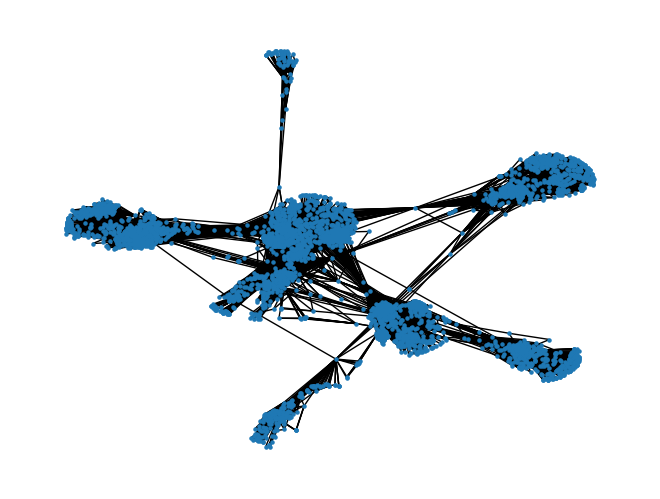

In [14]:
import matplotlib.pyplot as plt
np.random.seed(0)
nx.draw(G, node_size=5)
plt.show()

In [15]:
import networkx as nx
G = nx.Graph()
for id1, id2 in df_friends.values:
    node1 = col_to_mapping['Profile_ID'][id1]
    node2 = col_to_mapping['Profile_ID'][id2]
    G.add_edge(node1, node2)

In [16]:
import networkx as nx


In [17]:
import markov_clustering as mc
matrix = nx.to_scipy_sparse_array(G)
result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)
num_clusters = len(clusters)
print(f"{num_clusters} clusters were found in the social graph.")


10 clusters were found in the social graph.


In [18]:
for cluster_id, node_indices in enumerate(clusters):
    for i in node_indices:
        node = nodes[i]
        G.nodes[node]['cluster_id'] = cluster_id


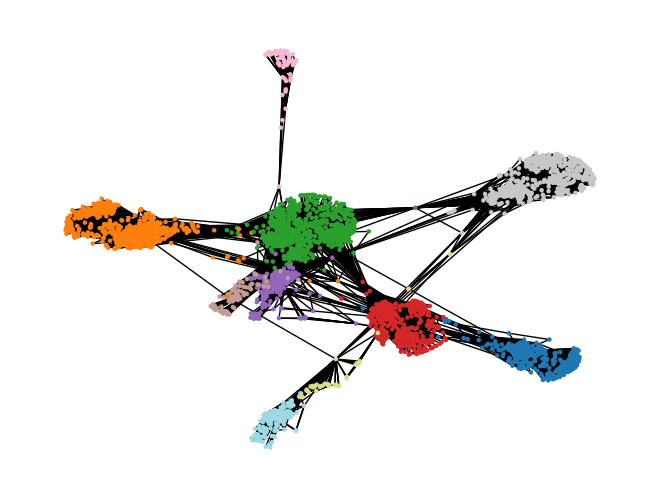

In [19]:
np.random.seed(0)
colors = [G.nodes[n]['cluster_id'] for n in G.nodes]
nx.draw(G, node_size=5, node_color=colors, cmap=plt.cm.tab20)
plt.show()

In [20]:
attribute_names = df_profile.columns
for attributes in df_profile.values:
    profile_id = attributes[0]
    G.add_node(profile_id)
    for name, att in zip(attribute_names[1:], attributes[1:]):
        G.nodes[profile_id][name] = att

first_node = nodes[0]
print(f"Attributes of node {first_node}:")
print(G.nodes[first_node])

Attributes of node 2899:
{'cluster_id': 0, 'Sex': 0, 'Relationship_Status': 0, 'Dorm': 5, 'Major': 13, 'Year': 2}


In [21]:
y = df_obs.Behavior.values
print(y)

[0 0 0 ... 1 1 1]


In [22]:
cols = ['Profile_ID', 'Friend', 'FoF']
features = {f'{col}_Edge_Count': [] for col in cols}

for node_ids in df_obs[cols].values:
    for node, feature_name in zip(node_ids, features.keys()):
        degree = G.degree(node)
        features[feature_name].append(degree)
df_features = pd.DataFrame(features)
X = df_features.values

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def evaluate(X, y, model_type=DecisionTreeClassifier, **kwargs):
 np.random.seed(0)
 X_train, X_test, y_train, y_test = train_test_split(X, y)
 clf = model_type(**kwargs)
 clf.fit(X_train, y_train)
 pred = clf.predict(X_test)
 f_measure = f1_score(pred, y_test, average='macro')
 return f_measure, clf
f_measure, clf = evaluate(X, y)
print(f"The f-measure is {f_measure:0.2f}")

The f-measure is 0.37


In [24]:
node_to_pagerank = nx.pagerank(G)
features = {f'{col}_PageRank': [] for col in cols}
for node_ids in df_obs[cols].values:
    for node, feature_name in zip(node_ids, features.keys()):
        pagerank = node_to_pagerank[node]
        features[feature_name].append(pagerank)

def update_features(new_features):
    for feature_name, values in new_features.items():
        df_features[feature_name] = values
    return df_features.values

X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f"The f-measure is {f_measure:0.2f}")


The f-measure is 0.38


In [25]:
features = {f'Shared_Cluster_{e}': [] for e in ['id_f', 'id_fof', 'f_fof']}
i = 0
for node_ids in df_obs[cols].values:
    c_id, c_f, c_fof = [G.nodes[n]['cluster_id'] for n in node_ids]
    features['Shared_Cluster_id_f'].append(int(c_id == c_f))
    features['Shared_Cluster_id_fof'].append(int(c_id == c_fof))
    features['Shared_Cluster_f_fof'].append(int(c_f == c_fof))
X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f"The f-measure is {f_measure:0.2f}")


The f-measure is 0.43


In [26]:
def view_top_features(clf, feature_names):
    for i in np.argsort(clf.feature_importances_)[::-1]:
        feature_name = feature_names[i]
        importance = clf.feature_importances_[i]
        if not round(importance, 2):
            break
        print(f"{feature_name}: {importance:0.2f}")

feature_names = df_features.columns
view_top_features(clf, feature_names)

Shared_Cluster_id_fof: 0.18
FoF_PageRank: 0.17
Profile_ID_PageRank: 0.17
Friend_PageRank: 0.15
FoF_Edge_Count: 0.12
Profile_ID_Edge_Count: 0.11
Friend_Edge_Count: 0.10


In [27]:
cluster_sizes = [len(cluster) for cluster in clusters]
features = {f'{col}_Cluster_Size': [] for col in cols}
for node_ids in df_obs[cols].values:
    for node, feature_name in zip(node_ids, features.keys()):
        c_id = G.nodes[node]['cluster_id']
        features[feature_name].append(cluster_sizes[c_id])
X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f"The f-measure is {f_measure:0.2f}")


The f-measure is 0.43


In [28]:
import re
def delete_features(df_features, regex=r'Cluster_Size'):
 df_features.drop(columns=[name for name in df_features.columns
                             if re.search(regex, name)], inplace=True)
 return df_features.values
X = delete_features(df_features)

In [29]:
friend_sharing_likelihood = {}
for node in nodes:
    neighbors = list(G[node])
    friendship_count = 0
    total_possible = 0
    for i, node1 in enumerate(neighbors[:-1]):
        for node2 in neighbors[i + 1:]:
            if node1 in G[node2]:
                friendship_count += 1
            total_possible += 1
    prob = friendship_count / total_possible if total_possible else 0
    friend_sharing_likelihood[node] = prob


In [30]:
features = {f'{col}_Friend_Sharing_Likelihood': [] for col in cols}
for node_ids in df_obs[cols].values:
    for node, feature_name in zip(node_ids, features.keys()):
        sharing_likelihood = friend_sharing_likelihood[node]
        features[feature_name].append(sharing_likelihood)

X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f"The f-measure is {f_measure:0.2f}")


The f-measure is 0.49


In [31]:
feature_names = df_features.columns
view_top_features(clf, feature_names)

Shared_Cluster_id_fof: 0.18
Friend_Friend_Sharing_Likelihood: 0.13
FoF_PageRank: 0.11
Profile_ID_PageRank: 0.11
Profile_ID_Friend_Sharing_Likelihood: 0.10
FoF_Friend_Sharing_Likelihood: 0.10
FoF_Edge_Count: 0.08
Friend_PageRank: 0.07
Profile_ID_Edge_Count: 0.07
Friend_Edge_Count: 0.06


In [33]:
attributes = ['Sex', 'Relationship_Status', 'Year']
for attribute in attributes:
    features = {f'{col}_{attribute}_Value': [] for col in cols}
    for node_ids in df_obs[cols].values:
        for node, feature_name in zip(node_ids, features.keys()):
            att_value = G.nodes[node].get(attribute, 0)
            features[feature_name].append(att_value)
    X = update_features(features)
    f_measure, clf = evaluate(X, y)
    print(f"The f-measure is {f_measure:0.2f}")



The f-measure is 0.74
The f-measure is 0.74
The f-measure is 0.74


In [35]:
attributes = ['Major', 'Dorm']
for attribute in attributes:
    features = {f'Shared_{attribute}_{e}': [] for e in ['id_f', 'id_fof', 'f_fof']}
    for node_ids in df_obs[cols].values:
        att_id, att_f, att_fof = [G.nodes[n].get(attribute, -1) for n in node_ids]
        features[f'Shared_{attribute}_id_f'].append(int(att_id == att_f))
        features[f'Shared_{attribute}_id_fof'].append(int(att_id == att_fof))
        features[f'Shared_{attribute}_f_fof'].append(int(att_f == att_fof))
    X = update_features(features)
    f_measure, clf = evaluate(X, y)
    print(f"The f-measure is {f_measure:0.2f}")

The f-measure is 0.82
The f-measure is 0.82


In [37]:
from collections import Counter

for attribute in ['Major', 'Dorm']:
    counter = Counter(df_profile[attribute].values)
    att_to_size = {k: v for k, v in counter.items()}
    features = {f'{col}_{attribute}_Size': [] for col in cols}
    for node_ids in df_obs[cols].values:
        for node, feature_name in zip(node_ids, features.keys()):
            size = att_to_size[G.nodes[node][attribute]]
            features[feature_name].append(size)
    X = update_features(features)
    f_measure, clf = evaluate(X, y)
    print(f"The f-measure is {f_measure:0.2f}")

The f-measure is 0.85
The f-measure is 0.85


In [38]:
feature_names = df_features.columns.values
view_top_features(clf, feature_names)

FoF_Dorm_Size: 0.25
Shared_Cluster_id_fof: 0.16
Shared_Dorm_id_fof: 0.05
FoF_PageRank: 0.04
Profile_ID_Major_Size: 0.04
FoF_Major_Size: 0.04
FoF_Edge_Count: 0.04
Profile_ID_PageRank: 0.03
Profile_ID_Friend_Sharing_Likelihood: 0.03
Friend_Friend_Sharing_Likelihood: 0.03
Friend_Edge_Count: 0.03
Shared_Major_id_fof: 0.03
FoF_Friend_Sharing_Likelihood: 0.02
Friend_PageRank: 0.02
Profile_ID_Dorm_Size: 0.02
Profile_ID_Edge_Count: 0.02
Profile_ID_Sex_Value: 0.02
Friend_Major_Size: 0.02
Profile_ID_Relationship_Status_Value: 0.02
FoF_Sex_Value: 0.01
Friend_Dorm_Size: 0.01
Profile_ID_Year_Value: 0.01
Friend_Sex_Value: 0.01
Shared_Major_id_f: 0.01
Friend_Relationship_Status_Value: 0.01
Friend_Year_Value: 0.01


In [39]:
from sklearn.tree import export_text
clf_depth2 = DecisionTreeClassifier(max_depth=2)
clf_depth2.fit(X, y)
text_tree = export_text(clf_depth2, feature_names=list(feature_names))
print(text_tree)

|--- FoF_Dorm_Size <= 278.50
|   |--- Shared_Cluster_id_fof <= 0.50
|   |   |--- class: 0
|   |--- Shared_Cluster_id_fof >  0.50
|   |   |--- class: 0
|--- FoF_Dorm_Size >  278.50
|   |--- Shared_Cluster_id_fof <= 0.50
|   |   |--- class: 0
|   |--- Shared_Cluster_id_fof >  0.50
|   |   |--- class: 1



In [40]:
counter = Counter(df_profile.Dorm.values)
for dorm, count in counter.items():
 if count < 279:
   continue
 print(f"Dorm {dorm} holds {count} students.")

Dorm 12 holds 2739 students.
Dorm 1 holds 413 students.


In [41]:
X_with_sizes = X.copy()
X = delete_features(df_features, regex=r'_Size')

In [42]:
from sklearn.ensemble import RandomForestClassifier
f_measure, clf = evaluate(X, y, model_type=RandomForestClassifier)
print(f"The f-measure is {f_measure:0.2f}")

The f-measure is 0.75


In [43]:
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
hyperparams = {'max_depth': list(range(1, 100)) + [None]}
clf_grid = GridSearchCV(DecisionTreeClassifier(), hyperparams,
scoring='f1_macro', cv=2)
clf_grid.fit(X, y)
best_f = clf_grid.best_score_
best_depth = clf_grid.best_params_['max_depth']
print(f"A maximized f-measure of {best_f:.2f} is achieved when "
f"max_depth equals {best_depth}")

A maximized f-measure of 0.84 is achieved when max_depth equals 5


In [44]:
np.random.seed(0)
clf_grid.fit(X_with_sizes, y)
best_f = clf_grid.best_score_
best_depth = clf_grid.best_params_['max_depth']
print(f"A maximized f-measure of {best_f:.2f} is achieved when "
f"max_depth equals {best_depth}")

A maximized f-measure of 0.85 is achieved when max_depth equals 6


In [45]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [46]:
feature_names = df_features.columns
view_top_features(clf, feature_names)

Shared_Dorm_id_fof: 0.42
Shared_Cluster_id_fof: 0.29
Shared_Major_id_fof: 0.10
Shared_Dorm_f_fof: 0.06
Profile_ID_Relationship_Status_Value: 0.04
Profile_ID_Sex_Value: 0.04
Friend_Edge_Count: 0.02
Friend_PageRank: 0.01
Shared_Dorm_id_f: 0.01


In [47]:
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X, y)
text_tree = export_text(clf_depth3,
feature_names=list(feature_names))
print(text_tree)

|--- Shared_Dorm_id_fof <= 0.50
|   |--- Shared_Cluster_id_fof <= 0.50
|   |   |--- Shared_Major_id_fof <= 0.50
|   |   |   |--- class: 0
|   |   |--- Shared_Major_id_fof >  0.50
|   |   |   |--- class: 0
|   |--- Shared_Cluster_id_fof >  0.50
|   |   |--- Shared_Major_id_fof <= 0.50
|   |   |   |--- class: 0
|   |   |--- Shared_Major_id_fof >  0.50
|   |   |   |--- class: 1
|--- Shared_Dorm_id_fof >  0.50
|   |--- Shared_Cluster_id_fof <= 0.50
|   |   |--- Profile_ID_Sex_Value <= 0.50
|   |   |   |--- class: 0
|   |   |--- Profile_ID_Sex_Value >  0.50
|   |   |   |--- class: 2
|   |--- Shared_Cluster_id_fof >  0.50
|   |   |--- Shared_Dorm_f_fof <= 0.50
|   |   |   |--- class: 1
|   |   |--- Shared_Dorm_f_fof >  0.50
|   |   |   |--- class: 1



In [48]:
y_reject = y *(y == 2)
f_measure, clf_reject = evaluate(X, y_reject, max_depth=5)
print(f"The f-measure is {f_measure:0.2f}")

The f-measure is 0.97


In [49]:
view_top_features(clf_reject, feature_names)

Profile_ID_Sex_Value: 0.40
Profile_ID_Relationship_Status_Value: 0.24
Shared_Major_id_fof: 0.21
Shared_Cluster_id_fof: 0.10
Shared_Dorm_id_fof: 0.05


In [50]:
text_tree = export_text(clf_reject,
feature_names=list(feature_names))
print(text_tree)

|--- Shared_Cluster_id_fof <= 0.50
|   |--- Shared_Major_id_fof <= 0.50
|   |   |--- Shared_Dorm_id_fof <= 0.50
|   |   |   |--- class: 0
|   |   |--- Shared_Dorm_id_fof >  0.50
|   |   |   |--- Profile_ID_Relationship_Status_Value <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Profile_ID_Relationship_Status_Value >  2.50
|   |   |   |   |--- Profile_ID_Sex_Value <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Profile_ID_Sex_Value >  0.50
|   |   |   |   |   |--- class: 2
|   |--- Shared_Major_id_fof >  0.50
|   |   |--- Profile_ID_Sex_Value <= 0.50
|   |   |   |--- class: 0
|   |   |--- Profile_ID_Sex_Value >  0.50
|   |   |   |--- Profile_ID_Relationship_Status_Value <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Profile_ID_Relationship_Status_Value >  2.50
|   |   |   |   |--- class: 2
|--- Shared_Cluster_id_fof >  0.50
|   |--- class: 0

